In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [182]:
df = pd.read_csv('../data/MPS/agg_filtered_boroughs_weekends.csv')

In [183]:
df['TimePeriod'] = pd.to_datetime(df['TimePeriod'])

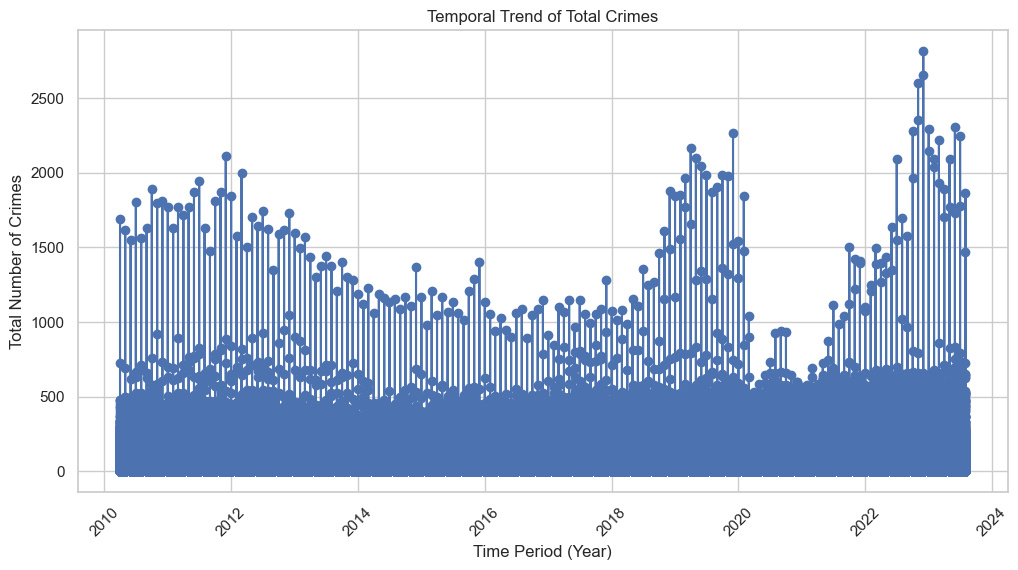

In [184]:
plt.figure(figsize=(12, 6))
plt.plot(df['TimePeriod'], df['Value'], marker='o', linestyle='-', color='b')
plt.title('Temporal Trend of Total Crimes')
plt.xlabel('Time Period (Year)')
plt.ylabel('Total Number of Crimes')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [185]:
df.set_index('TimePeriod', inplace=True)

In [186]:
df['Year'] = df.index.year
df['Month'] = df.index.month

In [187]:
monthly_crime_data = df.groupby(['Year', 'Month']).sum()

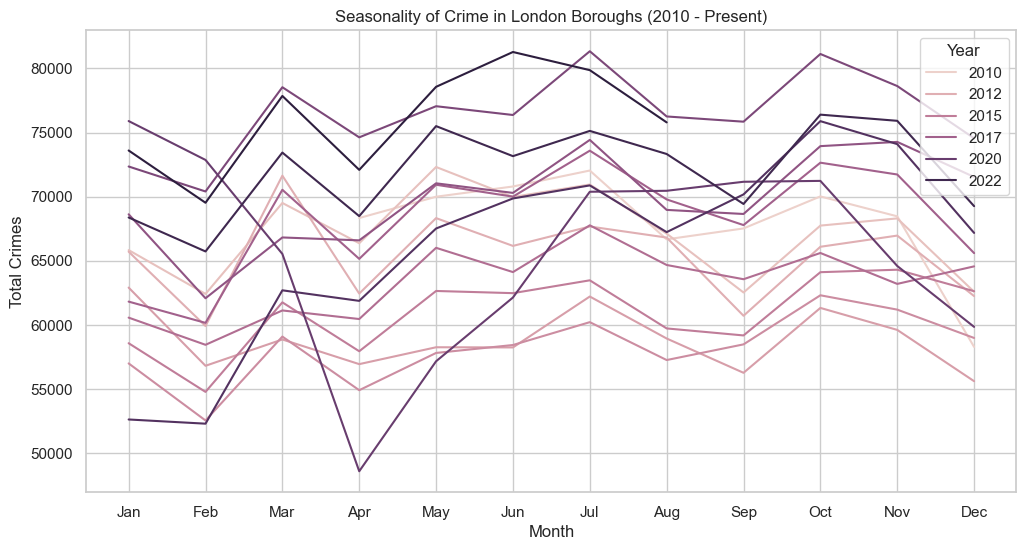

In [188]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Value', hue='Year', data=monthly_crime_data)
plt.title('Seasonality of Crime in London Boroughs (2010 - Present)')
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper right')
plt.show()

In [189]:
crime_seasonality = df.groupby(['CrimeType', 'Month'])['Value'].mean().reset_index()
crime_seasonality_pivot = crime_seasonality.pivot(index='Month', columns='CrimeType', values='Value')

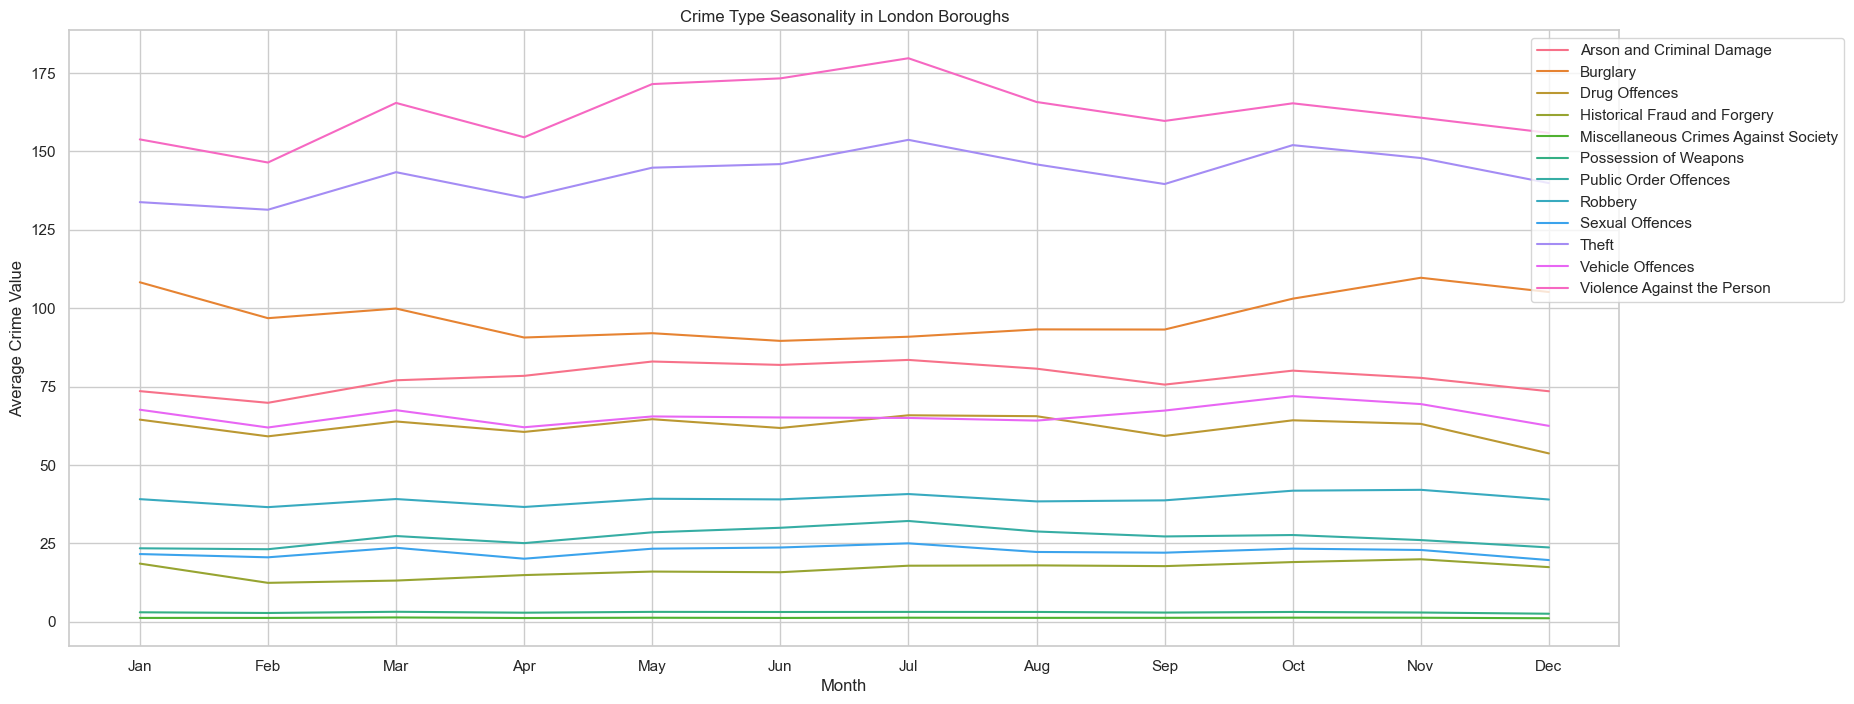

In [190]:
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
sns.lineplot(data=crime_seasonality_pivot, dashes=False)
plt.title('Crime Type Seasonality in London Boroughs')
plt.xlabel('Month')
plt.ylabel('Average Crime Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [191]:
sub_crime_seasonality = df.groupby(['CrimeSubtype', 'Month'])['Value'].mean().reset_index()
sub_crime_seasonality_pivot = sub_crime_seasonality.pivot(index='Month', columns='CrimeSubtype', values='Value')

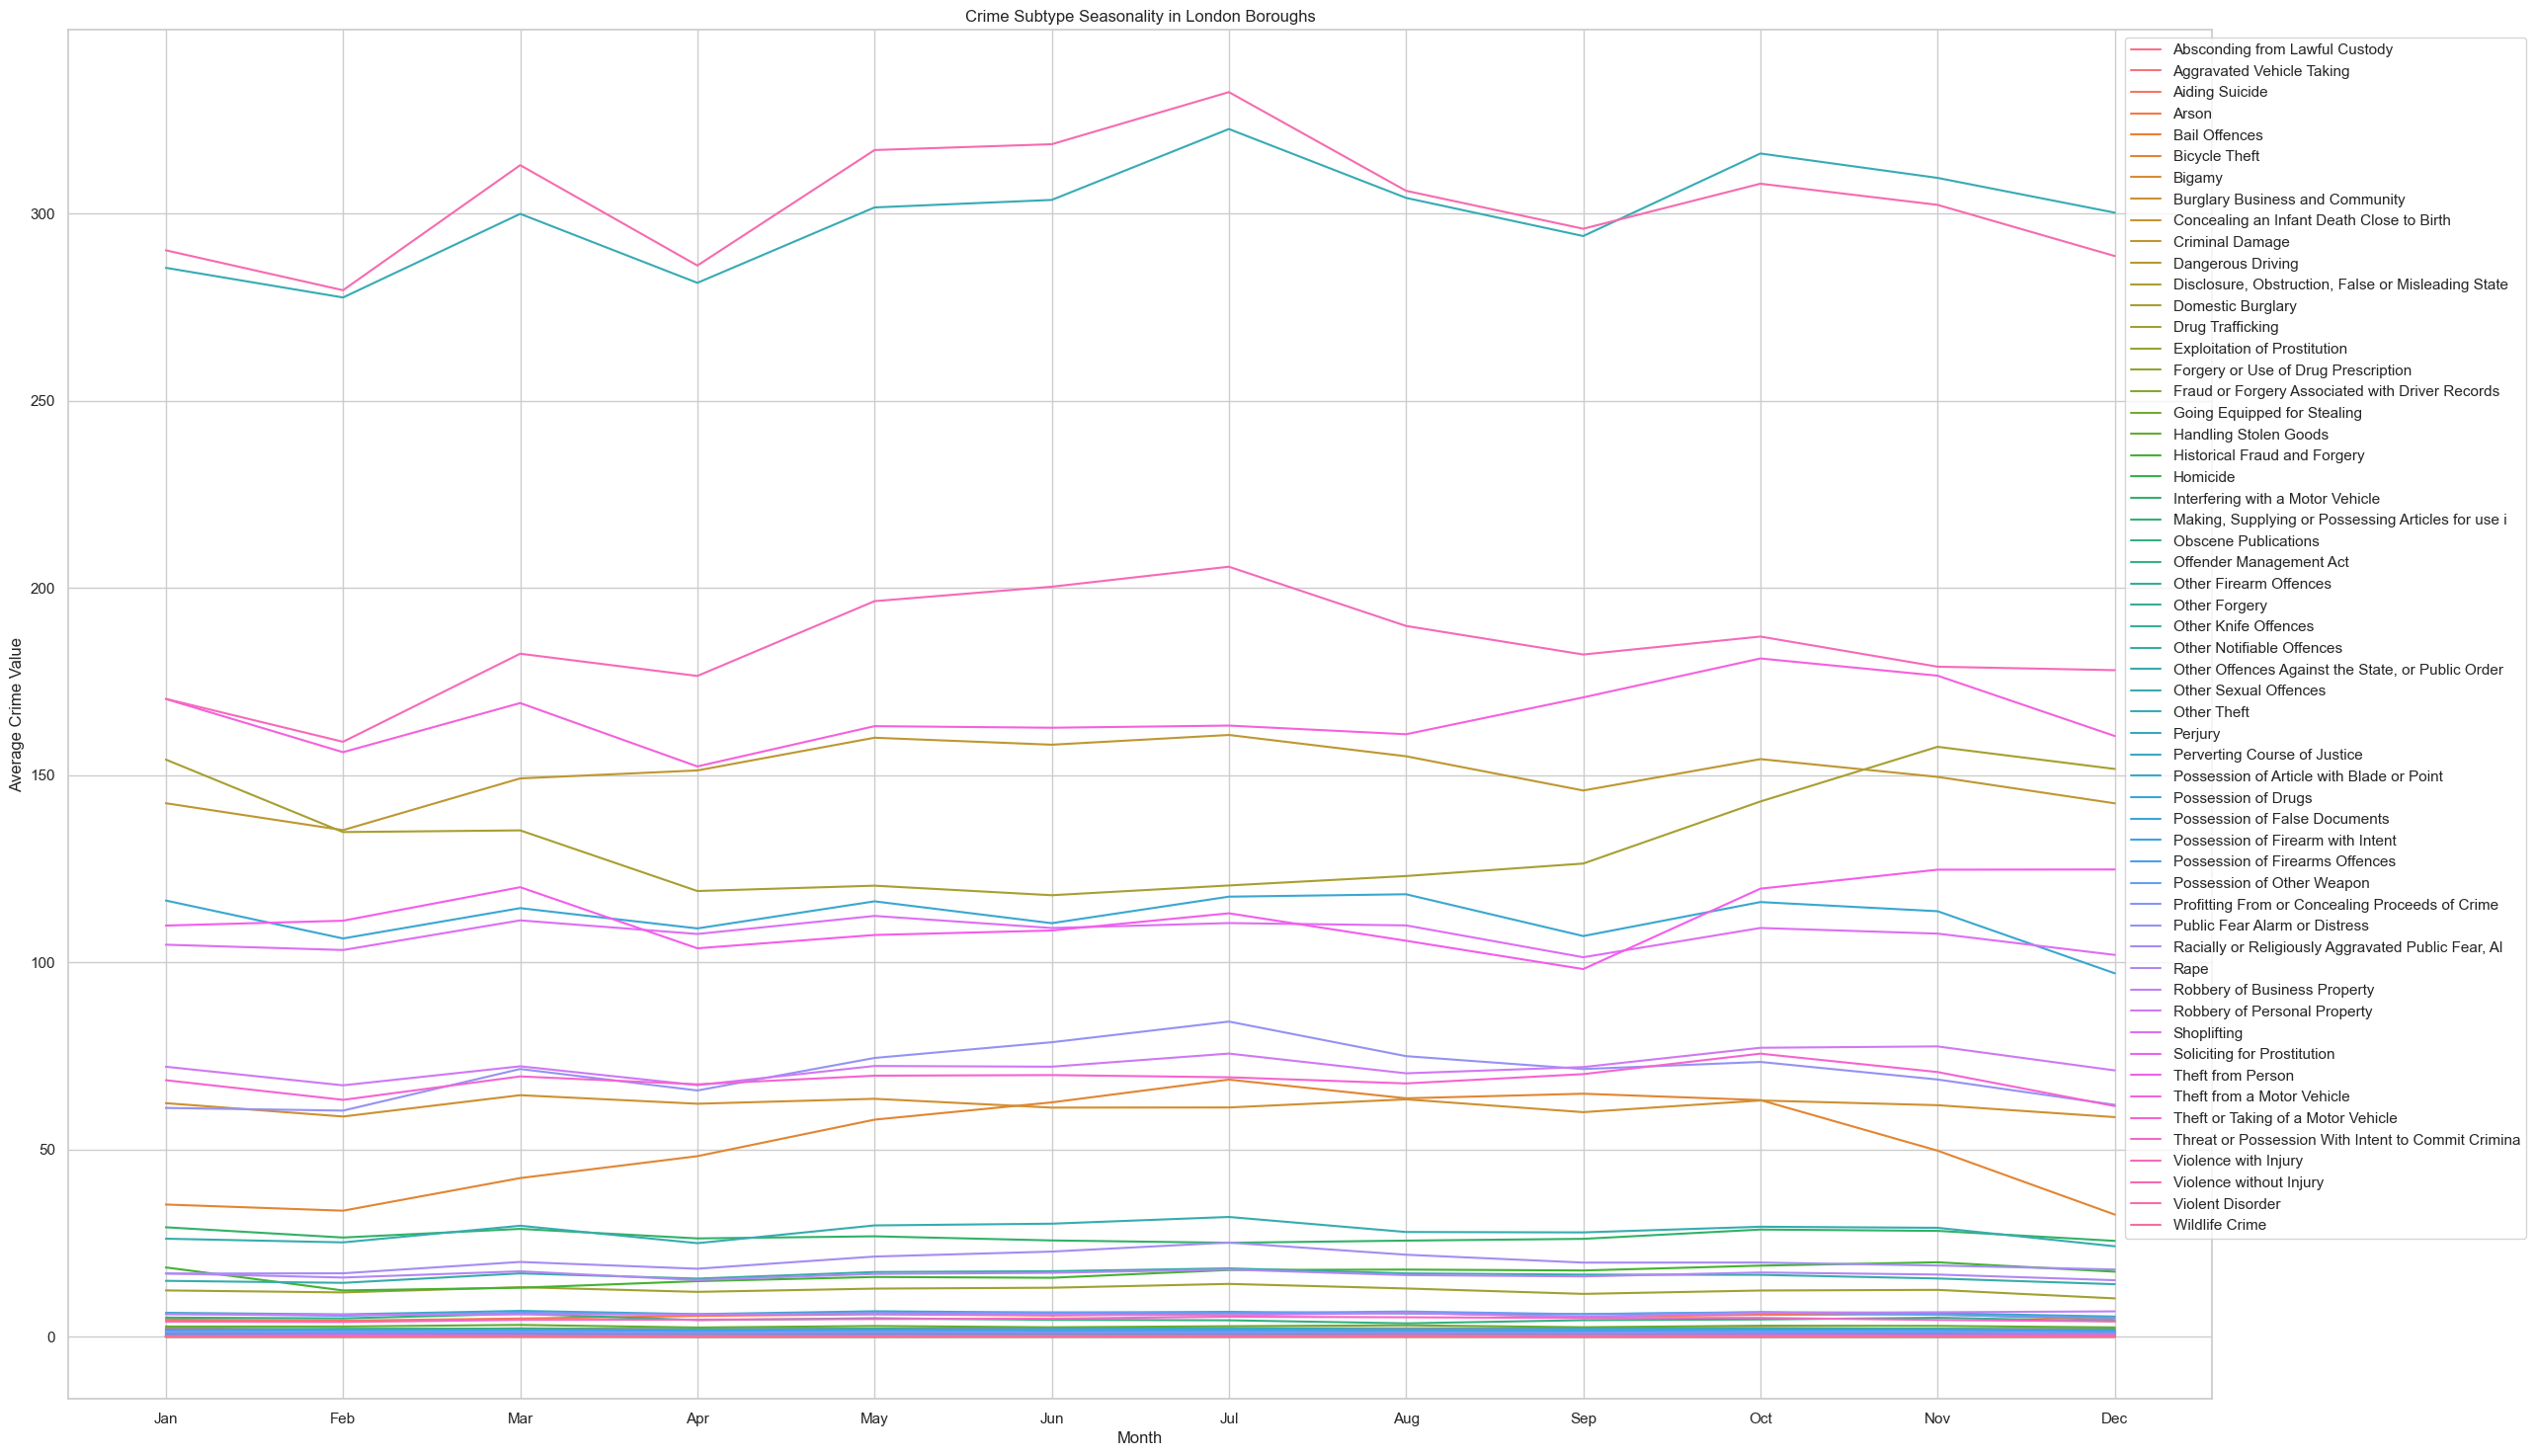

In [192]:
plt.figure(figsize=(28, 18))
sns.set(style="whitegrid")
sns.lineplot(data=sub_crime_seasonality_pivot, dashes=False)
plt.title('Crime Subtype Seasonality in London Boroughs')
plt.xlabel('Month')
plt.ylabel('Average Crime Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [193]:
borough_crime_rates = df.groupby('BoroughName')['Value'].mean().reset_index()
borough_crime_rates_sorted = borough_crime_rates.sort_values(by='Value')

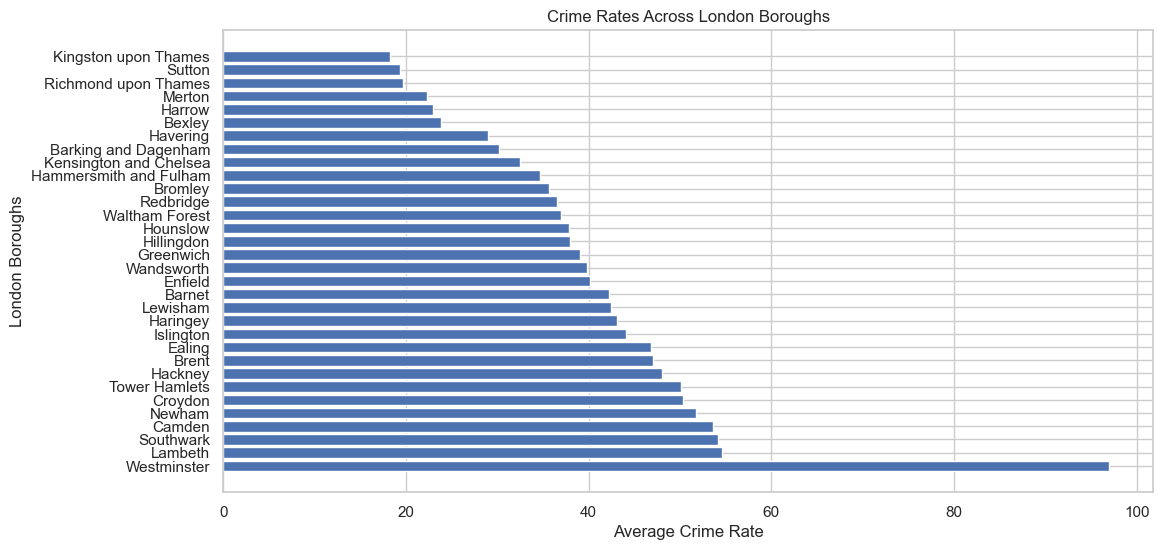

In [194]:
plt.figure(figsize=(12, 6))
plt.barh(borough_crime_rates_sorted['BoroughName'], borough_crime_rates_sorted['Value'])
plt.xlabel('Average Crime Rate')
plt.ylabel('London Boroughs')
plt.title('Crime Rates Across London Boroughs')
plt.gca().invert_yaxis() 
plt.show()

In [195]:
highest_crime_rate = borough_crime_rates_sorted['Value'].max()
lowest_crime_rate = borough_crime_rates_sorted['Value'].min()

highest_crime_boroughs = borough_crime_rates_sorted[borough_crime_rates_sorted['Value'] == highest_crime_rate]
lowest_crime_boroughs = borough_crime_rates_sorted[borough_crime_rates_sorted['Value'] == lowest_crime_rate]

print("Boroughs with the highest crime rate:")
print(highest_crime_boroughs)

print("\nBoroughs with the lowest crime rate:")
print(lowest_crime_boroughs)

Boroughs with the highest crime rate:
    BoroughName      Value
31  Westminster  96.990422

Boroughs with the lowest crime rate:
             BoroughName      Value
19  Kingston upon Thames  18.277589


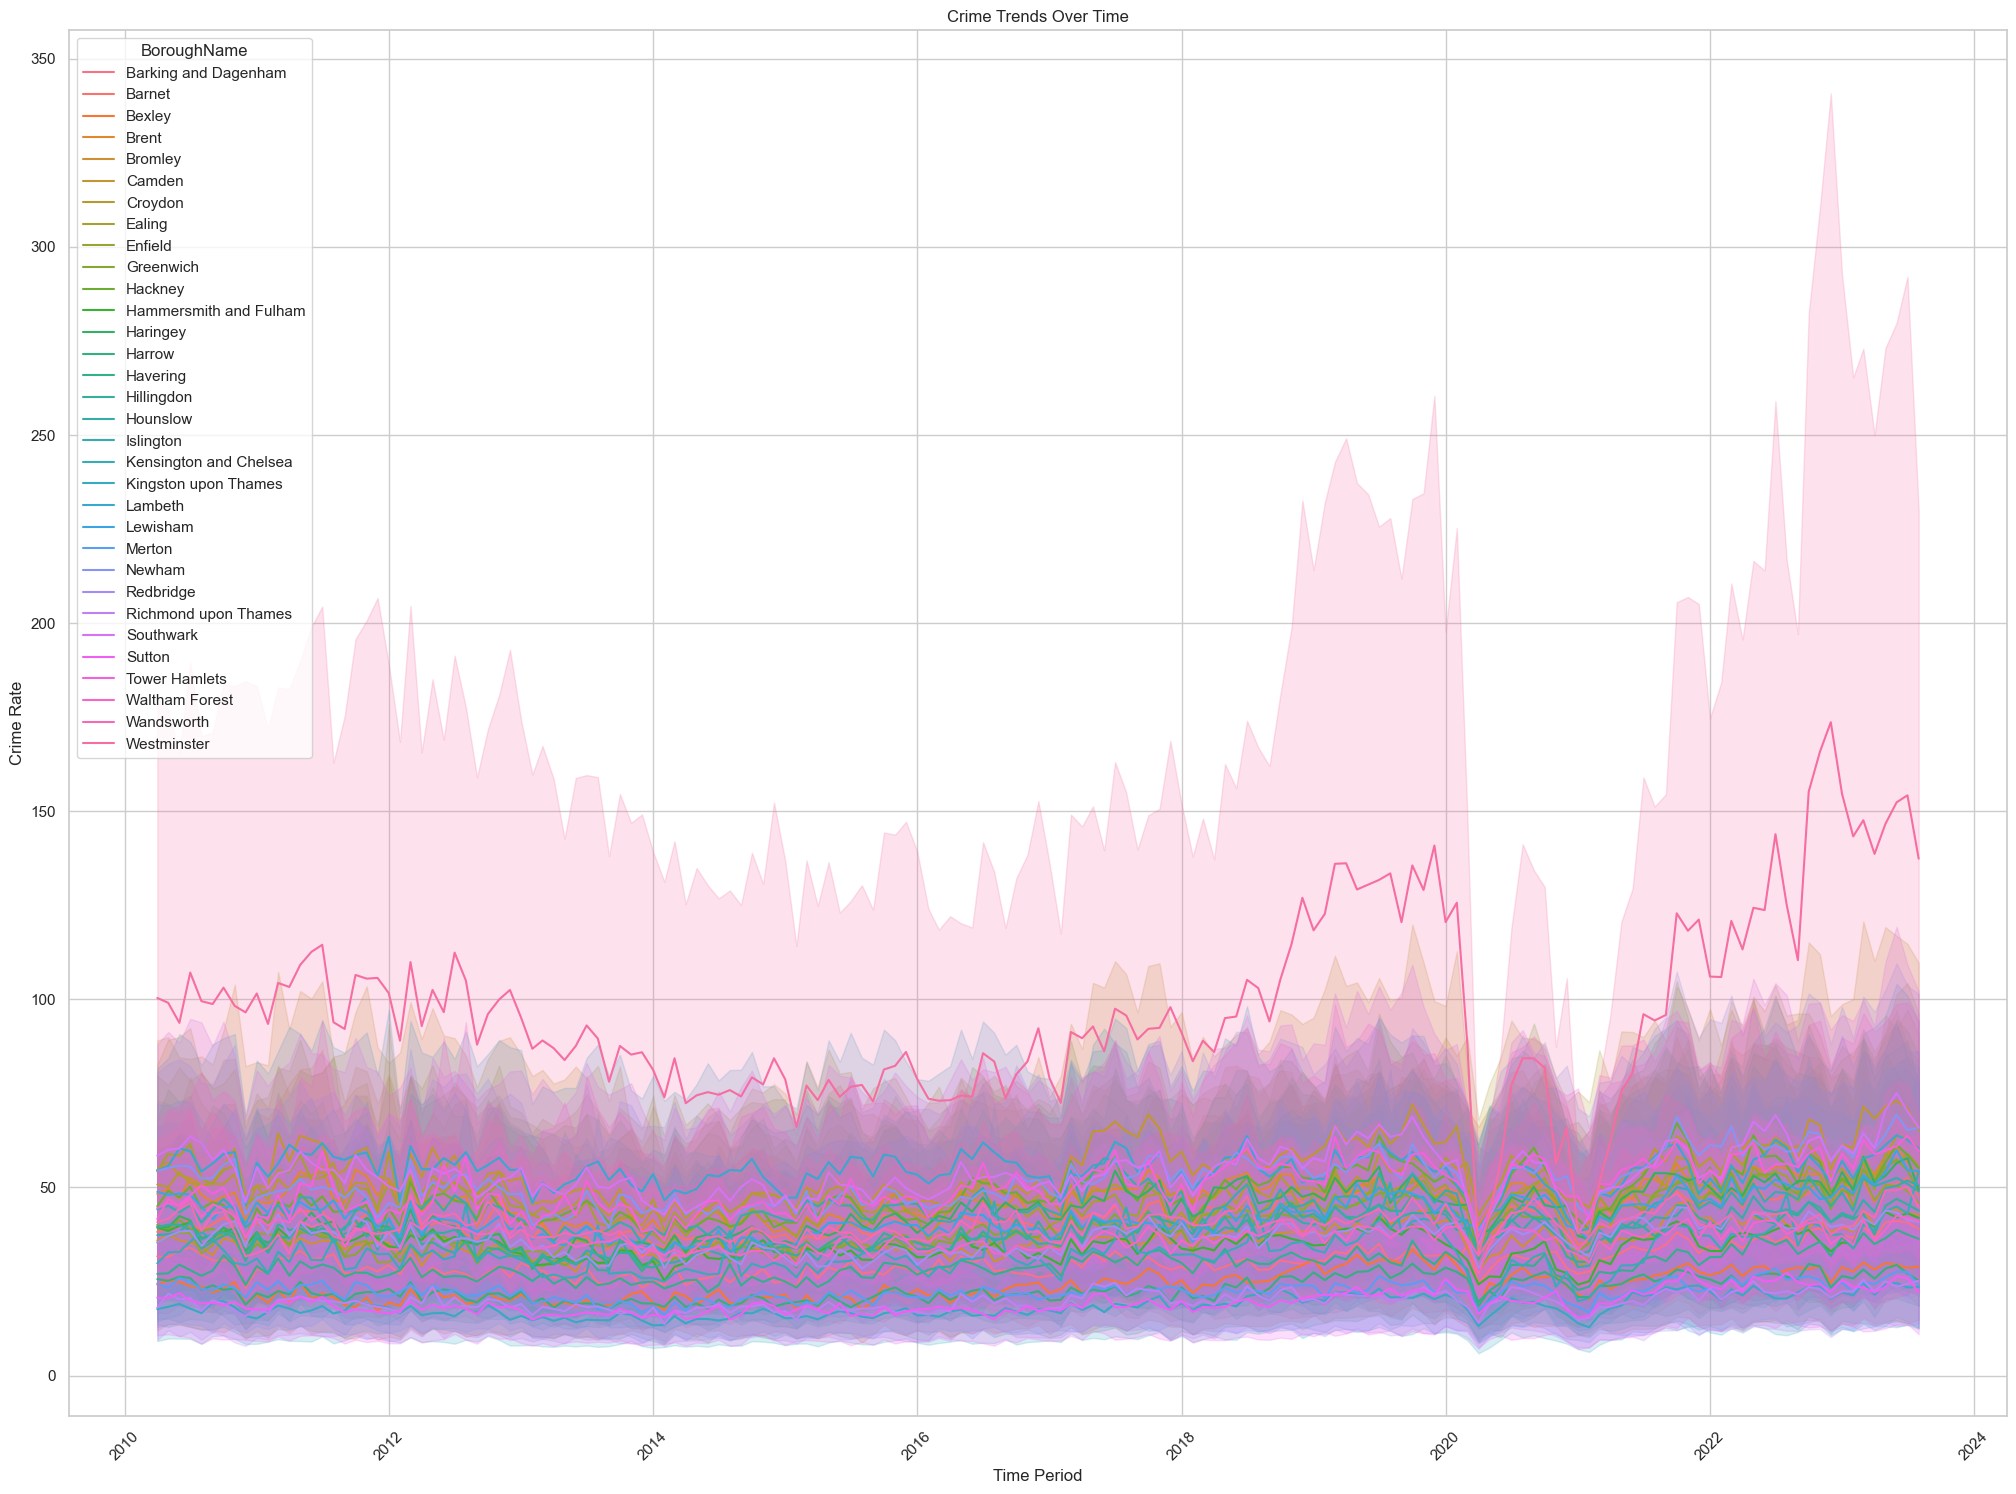

In [198]:
plt.figure(figsize=(25, 18))
sns.lineplot(data=df, x='TimePeriod', y='Value', hue='BoroughName')
plt.title('Crime Trends Over Time')
plt.xlabel('Time Period')
plt.ylabel('Crime Rate')
plt.xticks(rotation=45)
plt.show()

/Users/yulia/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


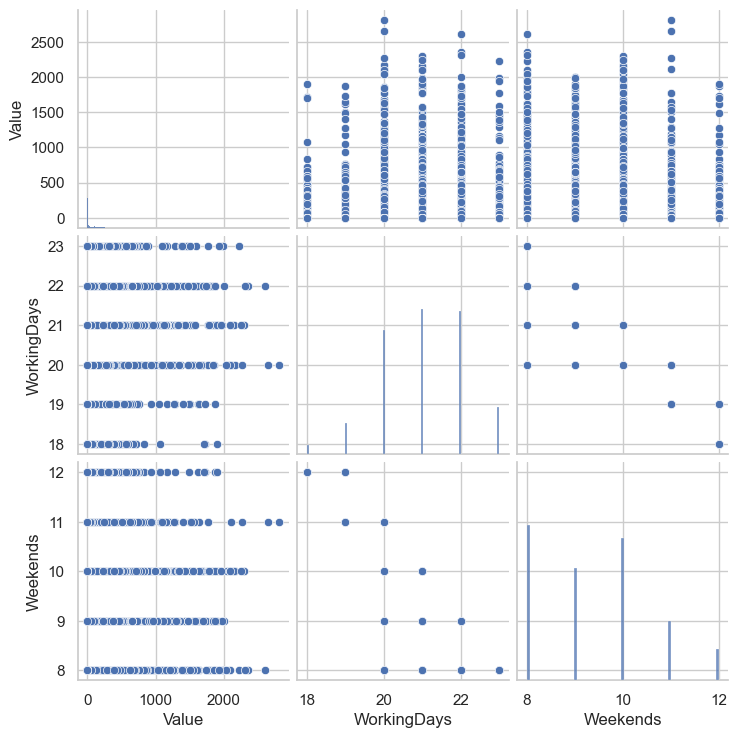

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     26.49
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           3.14e-12
Time:                        17:00:24   Log-Likelihood:            -1.5742e+06
No. Observations:              266921   AIC:                         3.148e+06
Df Residuals:                  266918   BIC:                         3.148e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.2331      6.573     -0.492      

In [196]:
sns.pairplot(df[['Value', 'WorkingDays', 'Weekends']])
plt.show()
model = smf.ols('Value ~ WorkingDays + Weekends', data=df).fit()
print(model.summary())

In [197]:
hypothesis_test = model.t_test("WorkingDays = 0")
print("Hypothesis Test for WorkingDays:\n", hypothesis_test)

hypothesis_test = model.t_test("Weekends = 0")
print("Hypothesis Test for Weekends:\n", hypothesis_test)

Hypothesis Test for WorkingDays:
                              Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.6367      0.231      7.087      0.000       1.184       2.089
Hypothesis Test for Weekends:
                              Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.9558      0.219      4.366      0.000       0.527       1.385


In [177]:
borough_of_interest = 'Westminster'

borough_data = df[df['BoroughName'] == borough_of_interest]

weekdays_data = borough_data[borough_data['WorkingDays'] == 1]
weekends_data = borough_data[borough_data['Weekends'] == 1]

t_stat, p_value = stats.ttest_ind(weekdays_data['Value'], weekends_data['Value'], equal_var=False)

if p_value < 0.05:
    print(f'The difference in crime rates between weekdays and weekends in {borough_of_interest} is statistically significant (p-value={p_value:.4f}).')
else:
    print(f'The difference in crime rates between weekdays and weekends in {borough_of_interest} is not statistically significant (p-value={p_value:.4f}).')

The difference in crime rates between weekdays and weekends in Westminster is not statistically significant (p-value=nan).


## Adding new features and removing insignificant

In [256]:
data = df.drop(columns=['WorkingDays', 'Weekends'])

In [257]:
data['YearlyTrend_Value'] = data.groupby(['BoroughName', 'CrimeType', 'CrimeSubtype', 'Month'])['Value'].transform('mean')

data

,BoroughName,CrimeType,CrimeSubtype,Value,Year,Month,YearlyTrend_Value
TimePeriod,,,,,,,
2010-04-01,Barking and Dagenham,Arson and Criminal Damage,Arson,6,2010,4,5.785714
2010-04-01,Barking and Dagenham,Arson and Criminal Damage,Criminal Damage,208,2010,4,130.642857
2010-04-01,Barking and Dagenham,Burglary,Burglary Business and Community,49,2010,4,37.500000
2010-04-01,Barking and Dagenham,Burglary,Domestic Burglary,118,2010,4,93.500000
2010-04-01,Barking and Dagenham,Drug Offences,Drug Trafficking,9,2010,4,8.928571
...,...,...,...,...,...,...,...
2023-08-01,Westminster,Vehicle Offences,Theft from a Motor Vehicle,224,2023,8,209.857143
2023-08-01,Westminster,Vehicle Offences,Theft or Taking of a Motor Vehicle,60,2023,8,59.142857
2023-08-01,Westminster,Violence Against the Person,Homicide,0,2023,8,0.500000
